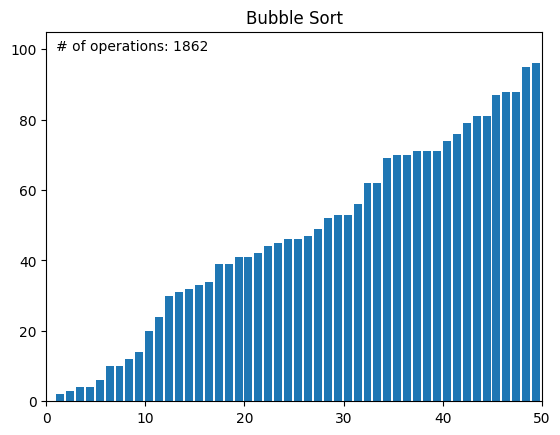

In [47]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# バブルソート
def bubble_sort(arr):
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
            yield arr


def visualize_sort_and_save(fname = "sort_anim.mp4"):
    # データの初期化
    data = np.random.randint(0, 100, 50)
    sorter = bubble_sort(data)

    fig, ax = plt.subplots()
    ax.set_title("Bubble Sort")
    bar_rects = ax.bar(range(len(data)), data, align="edge")

    # 上限と下限を設定
    ax.set_xlim(0, len(data))
    ax.set_ylim(0, int(1.1*max(data)))

    text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    iteration = [0] # 配列書き換えの副作用を利用（邪道）
    def update_fig(data, rects, iteration):
        for rect, val in zip(rects, data):
            rect.set_height(val)
        iteration[0] += 1
        text.set_text(f"# of operations: {iteration[0]}")

    anim = animation.FuncAnimation(fig, func=update_fig, fargs=(bar_rects, iteration),
                                   frames=sorter, repeat=False, interval=15, save_count=90000)
    anim.save(fname, writer="ffmpeg", fps=60)

    plt.show()

visualize_sort_and_save("bublle_sort.mp4")


RecursionError: maximum recursion depth exceeded in comparison

/Users/shouno/.pyenv/versions/3.10.3/lib/python3.10/site-packages/matplotlib/animation.py:1741: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


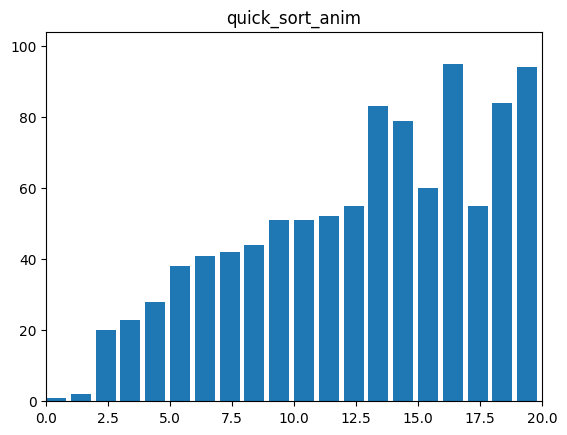

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from typing import List

import sys
sys.setrecursionlimit(20000)


def quick_sort_anim(arr: List[int], low: int, high: int):
    if low < high:
        p = partition(arr, low, high)
        yield from quick_sort_anim(arr, low, p)
        yield from quick_sort_anim(arr, p + 1, high)
    yield arr

def partition(arr: List[int], low: int, high: int) -> int:
    pivot = arr[low]
    i = low + 1
    j = high
    done = False
    while not done:
        while i <= j and arr[i] <= pivot:
            i += 1
        while arr[j] >= pivot and j >= i:
            j -= 1
        if j < i:
            done = True
        else:
            arr[i], arr[j] = arr[j], arr[i]
    arr[low], arr[j] = arr[j], arr[low]
    return j

# アニメーションを作成・表示する関数
def visualize_sort(sort_func, fname="sort_anim.mp4"):
    data = np.random.randint(0, 100, 20)
    sorter = sort_func(data, 0, len(data)-1)

    fig, ax = plt.subplots()
    ax.set_title(sort_func.__name__)
    bar_rects = ax.bar(range(len(data)), data, align="edge")
    ax.set_xlim(0, len(data))
    ax.set_ylim(0, int(1.1*max(data)))

    iteration = [0]
    def update_fig(data, rects, iteration):
        for rect, val in zip(rects, data):
            rect.set_height(val)
        iteration[0] += 1

    anim = animation.FuncAnimation(fig, func=update_fig,
        fargs=(bar_rects, iteration), frames=sorter, repeat=False,
        interval=15, save_count=90000)
    anim.save(fname, writer="ffmpeg", fps=60)

    plt.show()

visualize_sort(quick_sort_anim, fname = 'qsort_anim.mp4')


In [1]:
from typing import List

# ヒープソート
def heapify(arr: List[int], n: int, i: int):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr: List[int]) -> List[int]:
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

    return arr

# クイックソート
def quick_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# マージソート
def merge_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    return merge(merge_sort(left), merge_sort(right))

def merge(left: List[int], right: List[int]) -> List[int]:
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result

# テスト
arr = [12, 11, 13, 5, 6, 7]

print("Original:", arr)
print("Heap Sort:", heap_sort(arr.copy()))
print("Quick Sort:", quick_sort(arr.copy()))
print("Merge Sort:", merge_sort(arr.copy()))


Original: [12, 11, 13, 5, 6, 7]
Heap Sort: [5, 6, 7, 11, 12, 13]
Quick Sort: [5, 6, 7, 11, 12, 13]
Merge Sort: [5, 6, 7, 11, 12, 13]
